### Building ML Model to Classify Digits and Recognize Faces


In this project I will build classifiers to classify a given document or picture. There are 2 sections. In the first section I will classify an image as one of the digits between 0 to 9. In the second section I need to classify the image to figure out who the person - a simple face detection engine.




### Recognizing Handwritten Digits

We start with importing our libraries! We've also written a predict_random_image function to help us later on :-)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

### Understanding Data

Let's start with loading a very simple dataset! https://scikit-learn.org has libraries for us to do that. We will print:

*   The number of input data samples, dimensionality of the input data
*   The number of target samples for data (should match number of data samples)

For example, for a 3x3 image, the dimensionality is 9.

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

### Inspecting the Data

Let's take a look at the data! Plot the first 5 examples in our dataset and their training labels.

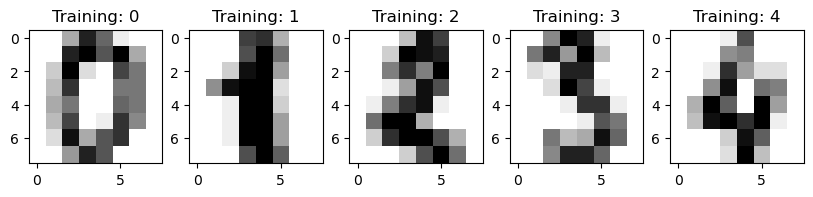

In [26]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    image = digits.images[i]
    label = digits.target[i]
    axes[i].imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    axes[i].set_title(f"Training: {label}")

### Create Train Test Split 

Split data to create training and testing data.  

In [21]:
X_train_digits, X_test_digits, y_train_digits, y_test_digits = train_test_split(digits.data, digits.target, test_size=0.25, random_state=42)

### Build Model
Use the training data to train a model! You can use Neural Network as your classifier.

In [28]:
mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train_digits, y_train_digits)

MLPClassifier(max_iter=1000, random_state=42)

### Evaluate 

Report the accuracy of the model on test set

In [29]:
y_pred_digits = mlp.predict(X_test_digits)
accuracy_digits = accuracy_score(y_test_digits, y_pred_digits)
print(f"Accuracy on the test set: {accuracy_digits:.4f}")

Accuracy on the test set: 0.9711


### Predict

Predict a label for a random image from unseen test data set

In [33]:
random_index = np.random.randint(0, len(X_test_digits))
random_image = X_test_digits[random_index]
random_label = y_test_digits[random_index]
predicted_label = mlp.predict([random_image])[0]

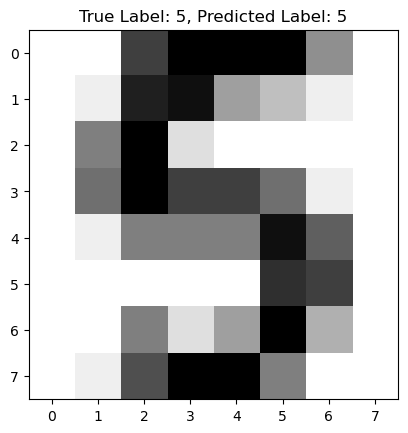

In [34]:
plt.figure()
plt.imshow(random_image.reshape(8, 8), cmap=plt.cm.gray_r, interpolation="nearest")
plt.title(f"True Label: {random_label}, Predicted Label: {predicted_label}")
plt.show()

### Reflection

Certain digits are harder for a model to classify because of the high variability in handwriting styles. 
For example, a '1' can be written as a simple vertical line or with a top and bottom stroke, making it resemble a '7'. 
Similarly, a '5' and a '9' can have very similar shapes, which leads to confusion for the classifier. 
These similarities in shape and structure for different digits are the primary reason some are more challenging to classify correctly than others.

### Labeled Faces

We will build a classifier to label famous faces! We want to import the LFW data from sklearn and view the first 4 samples of the dataset with their labels.

In [57]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

### Understanding Data

In [58]:
from sklearn.datasets import fetch_lfw_people

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

### Inspecting the Data
Plot a few images

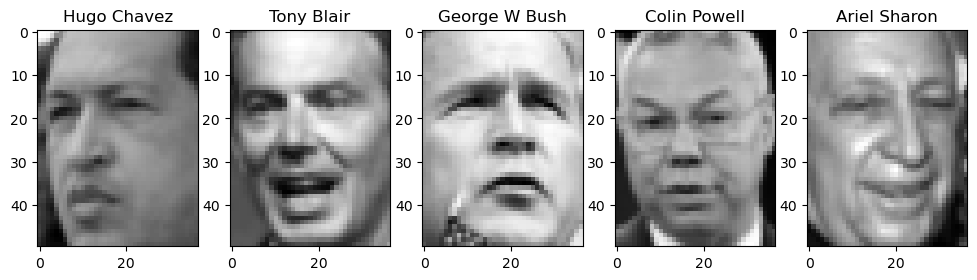

In [59]:
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i in range(5):
    image = lfw_people.images[i]
    label = lfw_people.target[i]
    axes[i].imshow(image, cmap='gray', interpolation="nearest")
    axes[i].set_title(f"{lfw_people.target_names[label]}")
plt.show()

### Create Train and Test Split
Create the training and testing data set

In [60]:
X_train, X_test, y_train, y_test = train_test_split(lfw_people.data, lfw_people.target, test_size = 0.2, random_state = 20)

### Build the Model
Choose three different types of classifier. More info in scikit-learn website. Try to get to more than 50% in accuracy. Now, we pick at least 3 different models to implement from: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning.

In [61]:
# 1. Support Vector Machine (SVM)
svm_classifier = SVC(class_weight='balanced', random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

In [62]:
# 2. K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [63]:
# 3. Random Forest
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

### Evaluate
Evaluate the model and report accuracy for all 3 models

In [64]:
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")

y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}")

y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")

SVM Accuracy: 0.8178
KNN Accuracy: 0.5891
Random Forest Accuracy: 0.6395


### Predict
Test the model in any random image from test set. Display the image and the prediction using all 3 models




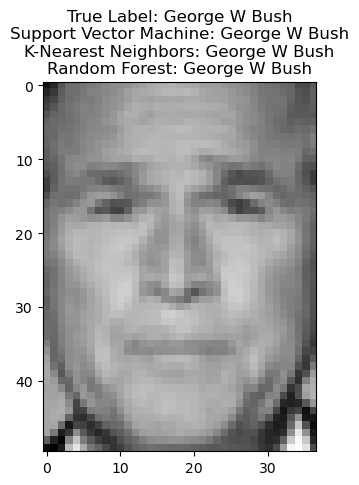

In [75]:
random_index = np.random.randint(0, len(X_test))
random_image_face = X_test[random_index]
true_label_face = y_test[random_index]

pred_svm = svm_classifier.predict([random_image_face])[0]
pred_knn = knn_classifier.predict([random_image_face])[0]
pred_rf = rf_classifier.predict([random_image_face])[0]

target_names = lfw_people.target_names

plt.figure()
plt.imshow(random_image_face.reshape(lfw_people.images.shape[1], lfw_people.images.shape[2]), cmap='gray')
plt.title(f"True Label: {target_names[true_label_face]}\n"
          f"Support Vector Machine: {target_names[pred_svm]}\n"
          f"K-Nearest Neighbors: {target_names[pred_knn]}\n"
          f"Random Forest: {target_names[pred_rf]}")
plt.show()